In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math as m

import plotly.express as px
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

!pip install country_converter -q
import country_converter as coco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00


In [6]:
sns.set(style = 'darkgrid')

In [53]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [21]:
print('The shape of the dataset : ', data.shape)

The shape of the dataset :  (3755, 11)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [32]:
print('The number of null values for each field is : \n\n ',data.isna().sum())

The number of null values for each field is : 

  work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [31]:
print('The number of unique values in this dataset is :\n\n',data.nunique())

The number of unique values in this dataset is :

 work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


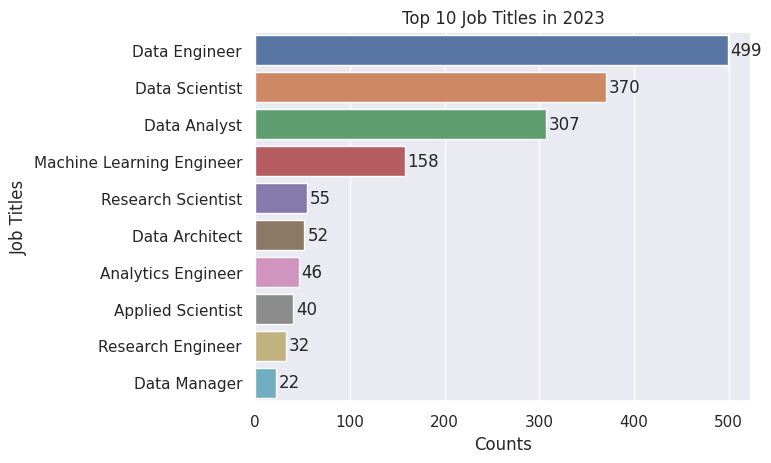

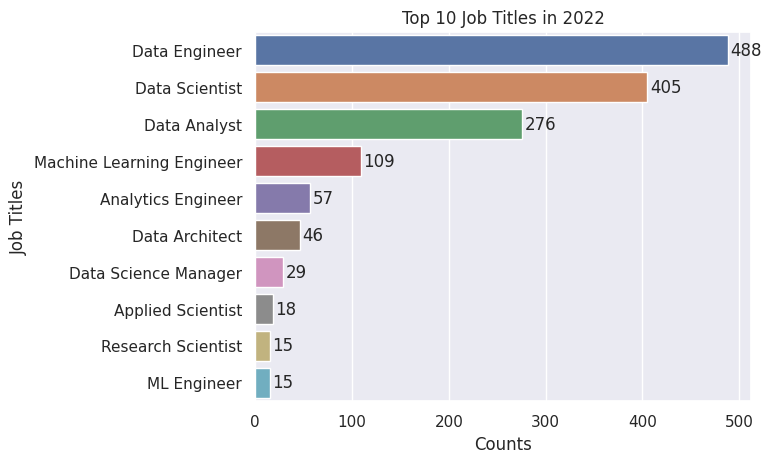

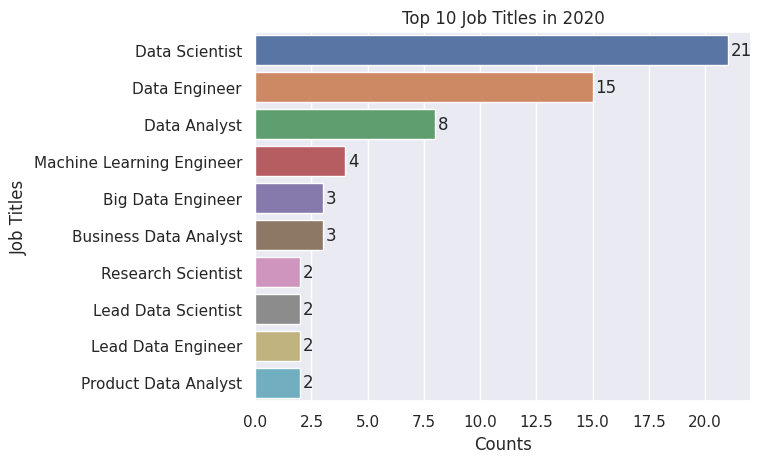

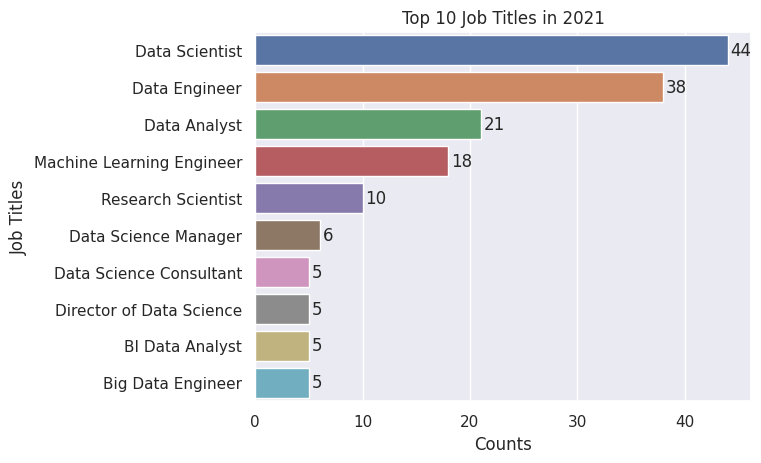

In [37]:
for i in data.work_year.unique():
  jobs = data[data['work_year']==i]['job_title'].value_counts().nlargest(10).reset_index()
  fig, ax = plt.subplots()
  ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = jobs.job_title)
  ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in %i' %i)
  ax.bar_label(ax.containers[0], padding = 2)


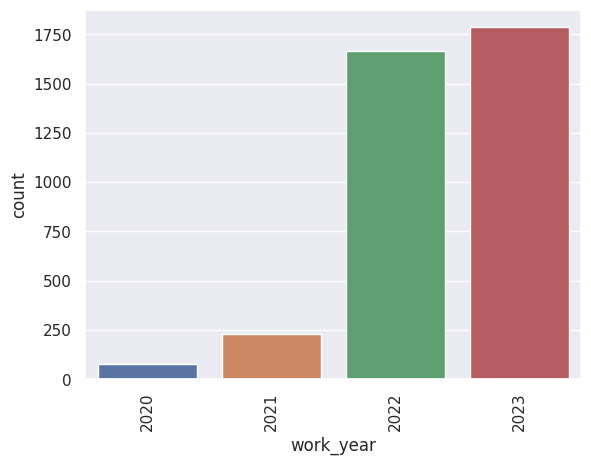

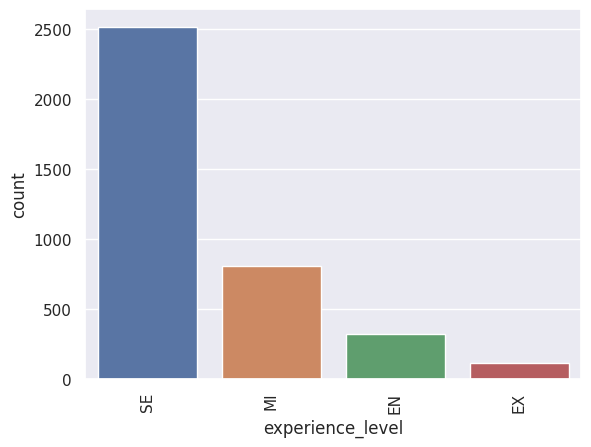

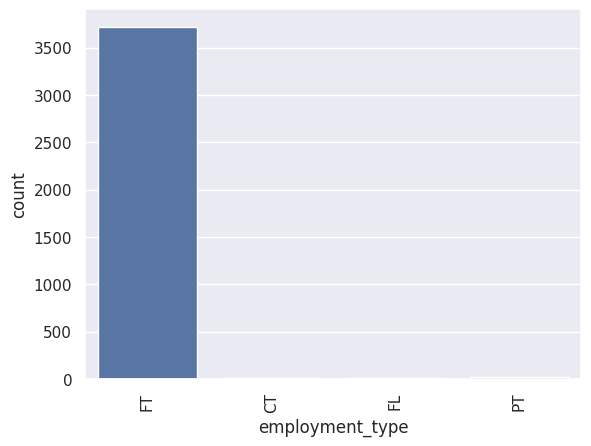

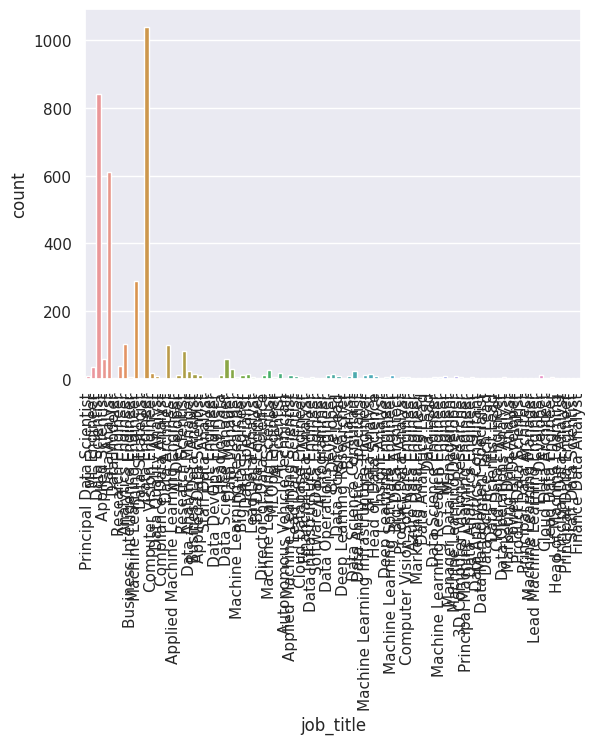

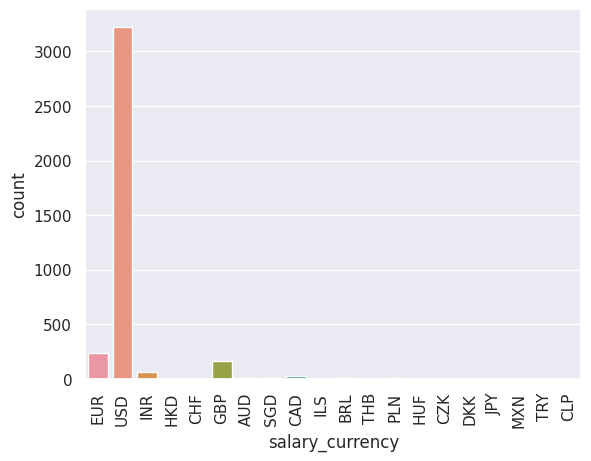

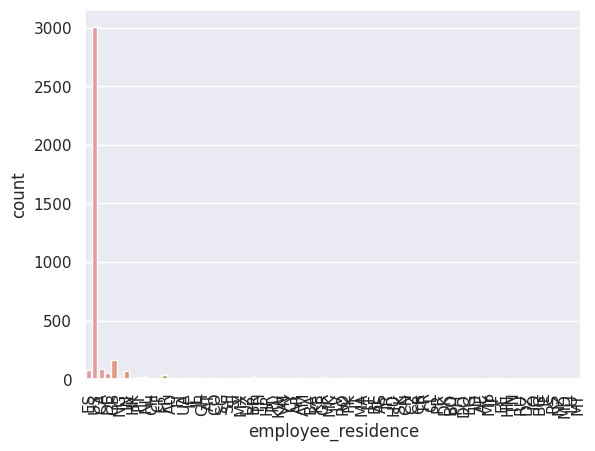

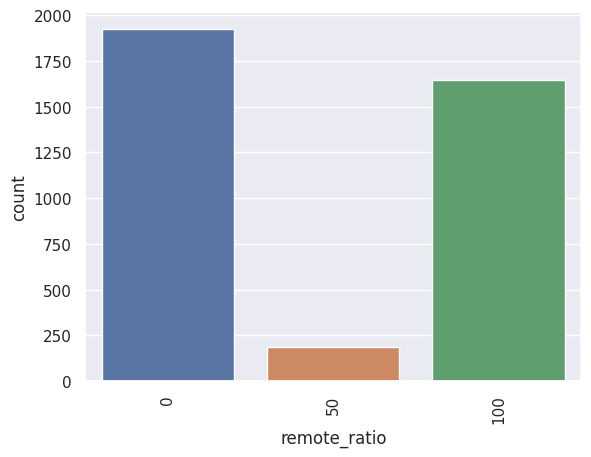

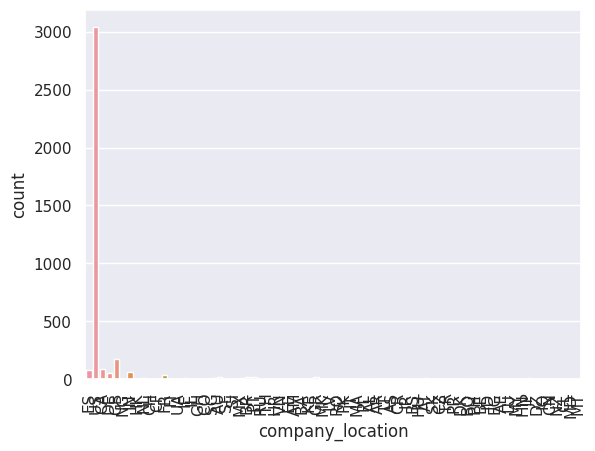

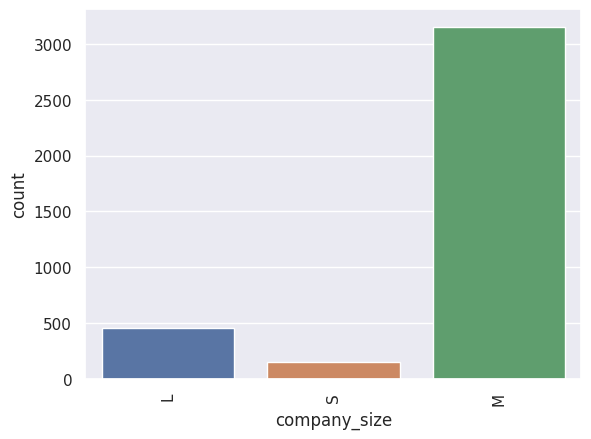

In [16]:
targets = data[['salary','salary_in_usd']]
features = data.drop(['salary','salary_in_usd'], axis = 1)

for i in features.columns:
    plt.figure()
    sns.countplot(x = data[i],data = data)
    plt.xticks(rotation=90)

[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

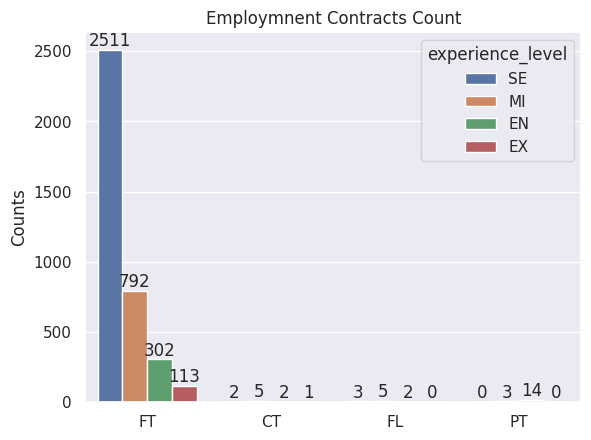

In [39]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = data, x = data.employment_type, hue = 'experience_level')

ax.set(xlabel='', ylabel='Counts', title='Employmnent Contracts Count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

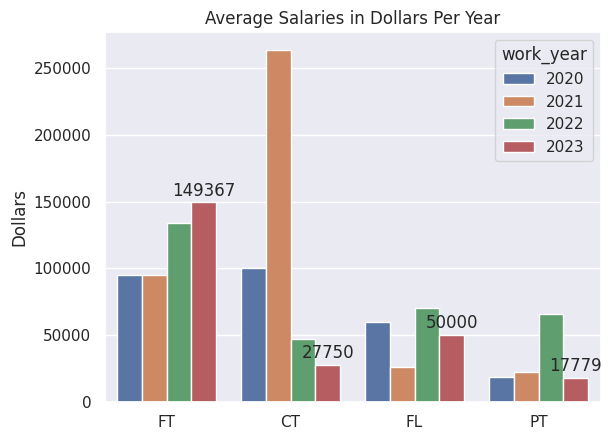

In [42]:
avg_salaries = data.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = data , x = 'employment_type', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

[Text(0, 2, '159569'),
 Text(0, 2, '116298'),
 Text(0, 2, '95284'),
 Text(0, 2, '203706')]

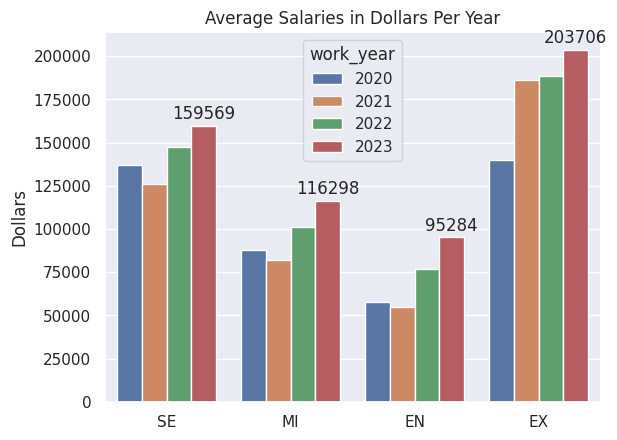

In [43]:
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = data , x = 'experience_level', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

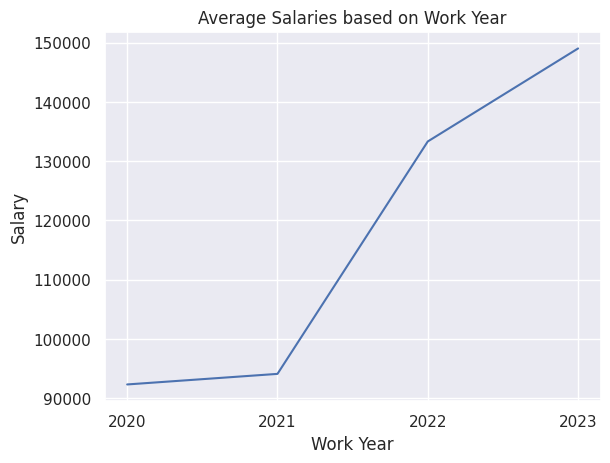

In [44]:
data['salary_in_usd'].groupby(data['work_year']) .mean()
year_based_salary=np.array(data['salary_in_usd'].groupby(data['work_year']) .mean())
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

In [46]:
rr = data.groupby('company_location')['remote_ratio'].mean().reset_index()
rr['company_location'] =  coco.convert(names = rr['company_location'], to = "ISO3")
print(rr.head())

fig = px.choropleth(rr,
                    locations = rr.company_location, 
                    color = rr.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs Locations")
fig.show()

  company_location  remote_ratio
0              ARE     66.666667
1              ALB     50.000000
2              ARM      0.000000
3              ARG    100.000000
4              ASM     66.666667


## Data Preprocessing

In [47]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [54]:
data['company_location'] = np.where(data['company_location']=="US",1,0)
data['employee_residence'] = np.where(data['employee_residence']=="US",1,0)
data['salary_currency'] = np.where(data['salary_currency']=="USD",1,0)
data.rename(columns={'company_location':'company_location_US'},inplace=True)
data.rename(columns={'employee_residence':'employee_residence_US'},inplace=True)
data.rename(columns={'salary_currency':'salary_currency_USD'},inplace=True)

In [55]:
data['job_title'] = np.where(data['job_title']=="Data Engineer",data['job_title'],
                            np.where(data['job_title']=="Data Scientist",data['job_title'],
                              np.where(data['job_title']=="Data Analyst",data['job_title'],
                                      np.where(data['job_title']=="Machine Learning Engineer",data['job_title'],"Other"))))

In [56]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency_USD,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,company_size
0,2023,SE,FT,Other,80000,0,85847,0,100,0,L
1,2023,MI,CT,Other,30000,1,30000,1,100,1,S
2,2023,MI,CT,Other,25500,1,25500,1,100,1,S
3,2023,SE,FT,Data Scientist,175000,1,175000,0,100,0,M
4,2023,SE,FT,Data Scientist,120000,1,120000,0,100,0,M


In [57]:
target = data['salary_in_usd']
data.drop(['salary','salary_in_usd'],axis=1, inplace=True)

In [58]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency_USD,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,company_size
0,2023,SE,FT,Other,0,85847,0,100,0,L
1,2023,MI,CT,Other,1,30000,1,100,1,S
2,2023,MI,CT,Other,1,25500,1,100,1,S
3,2023,SE,FT,Data Scientist,1,175000,0,100,0,M
4,2023,SE,FT,Data Scientist,1,120000,0,100,0,M


In [59]:
features = data.drop('salary_in_usd',axis=1)

In [61]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(features)
encoded = enc.transform(features)
# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.index = features.index
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,employee_residence_US_0,employee_residence_US_1,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_US_0,company_location_US_1,company_size_L,company_size_M,company_size_S
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## Model Selection and Training


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso,LassoCV,ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
xtrain,xtest, ytrain, ytest = train_test_split(encoded_df,target,  test_size = 0.3, random_state = 8)

In [66]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred_lr = lr.predict(xtest)
print(mean_squared_error(ytest,pred_lr))
print(r2_score(ytest,pred_lr))


2467438521.2005324
0.38547953330579143


In [70]:
r = Ridge()
r.fit(xtrain,ytrain)
pred_r = r.predict(xtest)
print(mean_squared_error(ytest,pred_r))
print(r2_score(ytest,pred_r))

2456976006.3375506
0.38808524342223494


In [71]:
rcv = RidgeCV()
rcv.fit(xtrain,ytrain)
pred_rcv = rcv.predict(xtest)
print(mean_squared_error(ytest,pred_rcv))
print(r2_score(ytest,pred_rcv))

2459465229.7386556
0.38746529738791224


In [72]:
l = Lasso()
l.fit(xtrain,ytrain)
pred_l = l.predict(xtest)
print(mean_squared_error(ytest,pred_l))
print(r2_score(ytest,pred_l))

2456585188.203092
0.38818257745520734


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.319e+09, tolerance: 1.040e+09



In [73]:
lcv = LassoCV()
lcv.fit(xtrain,ytrain)
pred_lcv = lcv.predict(xtest)
print(mean_squared_error(ytest,pred_lcv))
print(r2_score(ytest,pred_lcv))

2458048368.668364
0.38781816945287984
